In [ ]:
# ----------------------------------------------
#           ***  MOUNT DRIVE  ***
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/Mount.txt', 'r') as file:
    print(file.read())
# ==============================================

Mounted at /content/drive
Mount successful!


In [ ]:
# ----------------------------------------------
#          ***  IMPORTS BASIC  ***
from os import listdir, mkdir 
from os.path import isfile, join, exists
import pickle
import random
import datetime
import time
import math

def seconds_to_m_s(seconds):
    minutes = math.floor(seconds // 60)
    seconds = math.ceil(seconds % 60)
    return minutes, seconds

start_work = time.time()
print('Start work at:', datetime.datetime.now().strftime("%H:%M:%S %Y.%m.%d"))
print("\nAll work took {} minutes {} seconds".format(*seconds_to_m_s(time.time() - start_work)))
# ==============================================

In [ ]:
# ----------------------------------------------
#         ***  IMPORTS PROJECT  ***
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
# ==============================================

In [ ]:
# ----------------------------------------------
#            ***  DIRECTORY  ***
# not run
base_dir = '/content/drive/My Drive/'
dataset_dir = join(base_dir, 'Datasets', 'jena_climate')
file_path = join(dataset_dir, 'jena_climate_2009_2016.csv')
# ==============================================

In [ ]:
df = pd.read_csv(file_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
head_list = list(df.columns)
print(head_list)

['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']


In [ ]:
temperature = df['T (degC)'].values
print(temperature.shape)

(420551,)


In [ ]:
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))
print('len_train:', train_split, '/', df.shape[0])

temperature_norm = np.copy(temperature)
temperature_mean = temperature_norm[:train_split].mean(axis=0)
temperature_std = temperature_norm[:train_split].std(axis=0)
temperature_norm = (temperature_norm - temperature_mean) / temperature_std
print('Temperature mean:', temperature_mean)
print('Temperature std:', temperature_std)

len_train: 300693 / 420551
Temperature mean: 9.250203962180695
Temperature std: 8.635015642805945


In [ ]:
step = 6                # 1 hour
past = 720              # 5 days
future = 72             # 12 hour

print('Step:', step)
print('Past:', past)
print('Future:', future)
sample_len = int(past/step)
print('Sample length: {0} / {1} = {2:.2f}'.format(past, step, past/step))
n_train_samples = train_split - past + 1
print('Number of samples for training:', n_train_samples)
print('train_split:', train_split)
print('end train labels:', n_train_samples*1+past)

val_space_x = temperature.shape[0] - train_split - future
val_space_y = temperature.shape[0] - train_split - past - future
val_split = train_split + future + past
print('val_space_x:', val_space_x)
print('val_space_y:', val_space_y)
print('val_split:', val_split)
n_val_samples = val_space_x - past + 1
print('Number of samples for validation:', n_val_samples)
print('dif:', n_val_samples - val_space_y)
n_val_samples = min(n_val_samples, val_space_y)

Step: 6
Past: 720
Future: 72
Sample length: 720 / 6 = 120.00
Number of samples for training: 299974
train_split: 300693
end train labels: 300694
val_space_x: 119786
val_space_y: 119066
val_split: 301485
Number of samples for validation: 119067
dif: 1


In [ ]:
x_train = np.zeros((n_train_samples, sample_len)) # (299974, 120)
y_train = np.zeros((n_train_samples))          # (299974, 1)
print('x_train', x_train.shape)
print('y_train', y_train.shape)

x_val = np.zeros((n_val_samples, sample_len)) # (119067, 120)
y_val = np.zeros((n_val_samples))          # (119067, 1)
print('x_val', x_val.shape)
print('y_val', y_val.shape)

for i in range(n_train_samples):
    x_train[i] = temperature[i:i+past:step]
    y_train[i] = temperature[i+past+future]

for i in range(n_val_samples):
    x_val[i] = temperature[train_split+i:train_split+i+past:step]
    y_val[i] = temperature[val_split+i]

x_train (299974, 120)
y_train (299974,)
x_val (119066, 120)
y_val (119066,)


In [ ]:
x_train_norm = np.zeros((n_train_samples, sample_len)) # (299974, 120)
y_train_norm = np.zeros((n_train_samples))          # (299974, 1)
print('x_train_norm', x_train_norm.shape)
print('y_train_norm', y_train_norm.shape)

x_val_norm = np.zeros((n_val_samples, sample_len)) # (119067, 120)
y_val_norm = np.zeros((n_val_samples))          # (119067, 1)
print('x_val_norm', x_val_norm.shape)
print('y_val_norm', y_val_norm.shape)

for i in range(n_train_samples):
    x_train_norm[i] = temperature_norm[i:i+past:step]
    y_train_norm[i] = temperature_norm[i+past+future]

for i in range(n_val_samples):
    x_val_norm[i] = temperature_norm[train_split+i:train_split+i+past:step]
    y_val_norm[i] = temperature_norm[val_split+i]

x_train_norm (299974, 120)
y_train_norm (299974,)
x_val_norm (119066, 120)
y_val_norm (119066,)


In [ ]:
t_min = np.min(temperature)
t_max = np.max(temperature)
t_range = np.abs(t_min) + np.abs(t_max)
print('t_min', t_min)
print('t_max', t_max)
print('t_range', round(t_range, 2))

t_min -23.01
t_max 37.28
t_range 60.29


In [ ]:
lstm_mae = 0.2940007746219635
print('TSTM MAE:', lstm_mae)
lstm_deg = lstm_mae * temperature_std
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(lstm_deg, lstm_deg*100/t_range))

TSTM MAE: 0.2940007746219635
MAE = 2.54 degC, erorr = 4.21 %


In [ ]:
%%time

# Linear

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

lin_reg_pred = lin_reg.predict(x_val)
lin_reg_mae = mean_absolute_error(y_val, lin_reg_pred)
print('Lin reg MAE:', lin_reg_mae)
lin_reg_deg = lin_reg_mae
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(lin_reg_deg, lin_reg_deg*100/t_range))

Lin reg MAE: 2.267926205656947
MAE = 2.27 degC, erorr = 3.76 %
CPU times: user 9.59 s, sys: 1.45 s, total: 11 s
Wall time: 7.02 s


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
%%time

# Linear norm

from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(x_train_norm, y_train_norm)

lin_reg_pred = lin_reg.predict(x_val_norm)
lin_reg_mae = mean_absolute_error(y_val_norm, lin_reg_pred)
print('Lin reg MAE:', lin_reg_mae)
lin_reg_deg = lin_reg_mae * temperature_std
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(lin_reg_deg, lin_reg_deg*100/t_range))

Lin reg MAE: 0.26264297593327646
MAE = 2.27 degC, erorr = 3.76 %
CPU times: user 8.3 s, sys: 235 ms, total: 8.53 s
Wall time: 4.85 s


In [ ]:
%%time
from sklearn import linear_model

# Ridge

model = linear_model.Ridge(alpha=0.1)
model.fit(x_train, y_train)

model_pred = model.predict(x_val)
model_mae = mean_absolute_error(y_val, model_pred)
print('Lin reg MAE:', model_mae)
model_deg = model_mae
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

Lin reg MAE: 2.267926208962326
MAE = 2.27 degC, erorr = 3.76 %
CPU times: user 910 ms, sys: 216 ms, total: 1.13 s
Wall time: 763 ms


In [ ]:
%%time
from sklearn import linear_model

# Ridge norm

model = linear_model.Ridge(alpha=0.1)
model.fit(x_train_norm, y_train_norm)

model_pred = model.predict(x_val_norm)
model_mae = mean_absolute_error(y_val_norm, model_pred)
print('Lin reg MAE:', model_mae)
model_deg = model_mae * temperature_std
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

Lin reg MAE: 0.26264300448582495
MAE = 2.27 degC, erorr = 3.76 %
CPU times: user 768 ms, sys: 196 ms, total: 964 ms
Wall time: 604 ms


In [ ]:
%%time
from sklearn import linear_model

# Lasso

model = linear_model.Lasso(alpha=0.1)
model.fit(x_train, y_train)

model_pred = model.predict(x_val)
model_mae = mean_absolute_error(y_val, model_pred)
print('Lin reg MAE:', model_mae)
model_deg = model_mae
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

Lin reg MAE: 2.2764571747483484
MAE = 2.28 degC, erorr = 3.78 %
CPU times: user 49 s, sys: 1.64 s, total: 50.7 s
Wall time: 26.2 s


In [ ]:
%%time
from sklearn import linear_model

# Lasso norm

model = linear_model.Lasso(alpha=0.1)
model.fit(x_train_norm, y_train_norm)

model_pred = model.predict(x_val_norm)
model_mae = mean_absolute_error(y_val_norm, model_pred)
print('Lin reg MAE:', model_mae)
model_deg = model_mae * temperature_std
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

Lin reg MAE: 0.2954137865454158
MAE = 2.55 degC, erorr = 4.23 %
CPU times: user 26.1 s, sys: 721 ms, total: 26.8 s
Wall time: 14 s


In [ ]:
%%time
from sklearn import linear_model

# BayesianRidge

model = linear_model.BayesianRidge()
model.fit(x_train, y_train)

model_pred = model.predict(x_val)
model_mae = mean_absolute_error(y_val, model_pred)
print('Lin reg MAE:', model_mae)
model_deg = model_mae
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lin reg MAE: 2.2680028402891153
MAE = 2.27 degC, erorr = 3.76 %
CPU times: user 15 s, sys: 414 ms, total: 15.4 s
Wall time: 8.33 s


In [ ]:
%%time
not run
from sklearn import svm

# SVM

model = svm.SVR()
model.fit(x_train, y_train)

model_pred = model.predict(x_val)
model_mae = mean_absolute_error(y_val, model_pred)
print('Lin reg MAE:', model_mae)
model_deg = model_mae
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

In [ ]:
print(y_val.shape)

(119066,)


In [ ]:
%%time
# not run
# SVM norm

model = svm.SVR()
model.fit(x_train_norm, y_train_norm)

model_pred = model.predict(x_val_norm)
model_mae = mean_absolute_error(y_val_norm, model_pred)
print('Lin reg MAE:', model_mae)
model_deg = model_mae * temperature_std
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

In [ ]:
# %%time
# from sklearn.neighbors import KNeighborsRegressor

# # KNeighbors

# model = KNeighborsRegressor(n_neighbors=2)
# model.fit(x_train, y_train)

model_pred = model.predict(x_val)
model_mae = mean_absolute_error(y_val, model_pred)
print('Lin reg MAE:', model_mae)
model_deg = model_mae
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

Lin reg MAE: 3.393138049485159
MAE = 3.39 degC, erorr = 5.63 %


In [ ]:
%%time
from sklearn.neighbors import RadiusNeighborsRegressor

# RadiusNeighborsR

model = RadiusNeighborsRegressor(radius=5)
model.fit(x_train, y_train)

model_pred = model.predict(x_val)
model_mae = mean_absolute_error(y_val, model_pred)
print('Lin reg MAE:', model_mae)
model_deg = model_mae
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

In [ ]:
%%time

import time

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

# import time
# print(time.strftime("%H:%M:%S", time.localtime()))

from sklearn import tree

# Decision tree

model = tree.DecisionTreeRegressor()
model.fit(x_train, y_train)

model_pred = model.predict(x_val)
model_mae = mean_absolute_error(y_val, model_pred)
print('Lin reg MAE:', model_mae)
model_deg = model_mae
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

08:34:33
Lin reg MAE: 3.196551576436598
MAE = 3.20 degC, erorr = 5.30 %
CPU times: user 1min 8s, sys: 139 ms, total: 1min 8s
Wall time: 1min 9s


In [ ]:
%%time
from sklearn import tree

# Decision tree norm

model = tree.DecisionTreeRegressor()
model.fit(x_train_norm, y_train_norm)

model_pred = model.predict(x_val_norm)
model_mae = mean_absolute_error(y_val_norm, model_pred)
print('Lin reg MAE:', model_mae)
model_deg = model_mae * temperature_std
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

Lin reg MAE: 0.37045115025320724
MAE = 3.20 degC, erorr = 5.31 %
CPU times: user 1min 8s, sys: 27.8 ms, total: 1min 8s
Wall time: 1min 9s


In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

# RandomForest

print(time.strftime("%H:%M:%S", time.localtime()))
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(x_train, y_train)

model_pred = model.predict(x_val)
model_mae = mean_absolute_error(y_val, model_pred)
print('Lin reg MAE:', model_mae)
model_deg = model_mae
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

08:37:14
Lin reg MAE: 2.368545320242555
MAE = 2.37 degC, erorr = 3.93 %
CPU times: user 1h 10min 31s, sys: 4.14 s, total: 1h 10min 35s
Wall time: 1h 11min 10s


In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

# RandomForest norm

model = RandomForestRegressor(n_estimators = 10, random_state = 42)
model.fit(x_train_norm, y_train_norm)

model_pred = model.predict(x_val_norm)
model_mae = mean_absolute_error(y_val_norm, model_pred)
print('Lin reg MAE:', model_mae)
model_deg = model_mae * temperature_std
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

Lin reg MAE: 0.28362265089836936
MAE = 2.45 degC, erorr = 4.06 %
CPU times: user 7min 6s, sys: 211 ms, total: 7min 6s
Wall time: 7min 9s


In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

# RandomForest

model = RandomForestRegressor(n_estimators = 10, random_state = 42)
model.fit(x_train, y_train)

model_pred = model.predict(x_val)
model_mae = mean_absolute_error(y_val, model_pred)
print('Lin reg MAE:', model_mae)
model_deg = model_mae
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

Lin reg MAE: 2.447147372045756
MAE = 2.45 degC, erorr = 4.06 %
CPU times: user 7min 2s, sys: 767 ms, total: 7min 3s
Wall time: 7min 6s


In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

# RandomForest

model = RandomForestRegressor(n_estimators = 200, random_state = 42)
model.fit(x_train, y_train)

model_pred = model.predict(x_val)
model_mae = mean_absolute_error(y_val, model_pred)
print('Lin reg MAE:', model_mae)
model_deg = model_mae
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

Lin reg MAE: 2.36233601573917
MAE = 2.36 degC, erorr = 3.92 %
CPU times: user 2h 20min 43s, sys: 5.72 s, total: 2h 20min 49s
Wall time: 2h 22min 4s


In [ ]:
%%time

import xgboost as xgb

# XGBoost

model = xgb.XGBRegressor(verbosity=3,
    n_estimators=100
    )
print('train...')
model.fit(x_train, y_train)
print('pred...')
model_pred = model.predict(x_val)
model_mae = mean_absolute_error(y_val, model_pred)
print('Lin reg MAE:', model_mae)
model_deg = model_mae
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

# Lin reg MAE: 2.344290178558048
# MAE = 2.34 degC, erorr = 3.89 %
# CPU times: user 2min 8s, sys: 123 ms, total: 2min 8s
# Wall time: 2min 9s

In [ ]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)

print('x_val', x_val.shape)
print('y_val', y_val.shape)

In [ ]:
%%time

# Linear

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

lin_reg_pred = lin_reg.predict(x_val)
lin_reg_mae = mean_absolute_error(y_val, lin_reg_pred)
print('Lin reg MAE:', lin_reg_mae)
lin_reg_deg = lin_reg_mae
print('MAE = {0:.2f} degC, erorr = {1:.02f} %'.format(lin_reg_deg, lin_reg_deg*100/t_range))

Lin reg MAE: 2.267926205656947
MAE = 2.27 degC, erorr = 3.76 %
CPU times: user 8.18 s, sys: 511 ms, total: 8.69 s
Wall time: 5.05 s


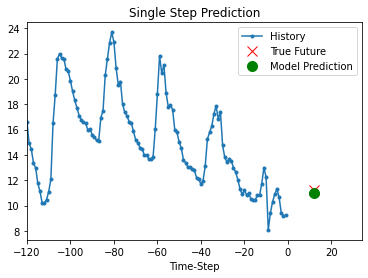

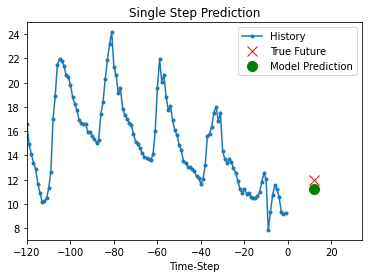

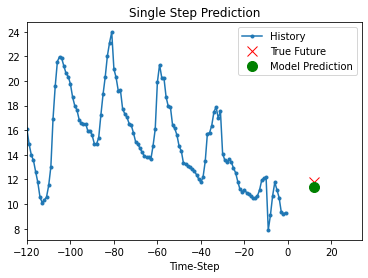

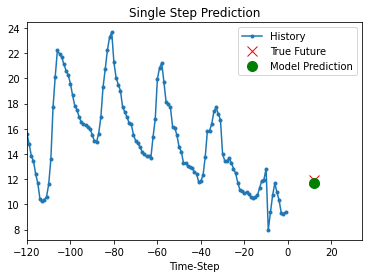

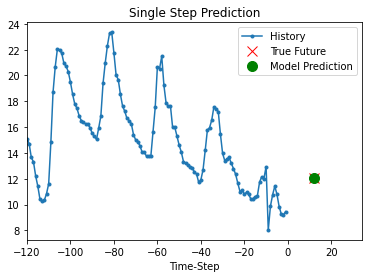

In [ ]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return

for i in range(5):
    show_plot(
        [x_val[i], y_val[i], lin_reg.predict(np.expand_dims(x_val[i], axis=0))[0]],
        12, # 12 hour or 0.5 day
        "Single Step Prediction",
    )

In [ ]:
# step = 6                # 1 hour
# past = 720              # 5 days
# future = 72             # 12 hour
pred_len = 360            # 2,5 days

plot_len = past + future + pred_len
print('Step:', step)
print('Past:', past)
print('Future:', future)
print('Prediction length:', pred_len)
pred_len_step = int(pred_len/step)
print('Prediction length step:', pred_len_step)
plot_len_step = int(plot_len/step)
print('Plot length: {0} / {1} = {2:.2f}'.format(plot_len, step, plot_len/step))
print('Number of validation samples:', n_val_samples)
val_space = n_val_samples + past - 1
print('Val space requirement:', val_space)
n_pred_samples = val_space - plot_len + 1
print('Number of samples for prediction:', n_pred_samples)
print('Unused number of samples:', n_val_samples - n_pred_samples)

Step: 6
Past: 720
Future: 72
Prediction length: 360
Prediction length step: 60
Plot length: 1152 / 6 = 192.00
Number of validation samples: 119066
Val space requirement: 119785
Number of samples for prediction: 118634
Unused number of samples: 432


In [ ]:
predictions = np.zeros((n_pred_samples, pred_len_step))
# predictions = np.zeros((n_pred_samples, plot_len_step))
print('Predictions shape:', predictions.shape)
mae_score = np.zeros((n_pred_samples, pred_len_step))
print('MAE score shape:', mae_score.shape)

Predictions shape: (118634, 60)
MAE score shape: (118634, 60)


In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = [6]
y_pred = [8]
mean_absolute_error(y_true, y_pred)

2.0

In [ ]:
%%time
# not run
for i in range(n_pred_samples):
    print(i, end=' ')
    x_pred = np.zeros(sample_len)

    for ind in range(pred_len_step):
        if ind != 0:
            x_pred[:-1] = x_pred[1:]
            x_pred[-1] = pred[0]
        else:
            x_pred[:] = x_val[i, :]
        
        pred = lin_reg.predict(np.expand_dims(x_pred, axis=0))
        mae_score[i, ind] = mean_absolute_error(np.expand_dims(y_val[i], axis=0), pred)
        # break

    # predictions[i] = np.ravel(x_pred[-pred_len_step:]) * data_std + data_mean
    # predictions[i] = np.ravel(x_pred[-pred_len_step:])
    predictions[i] = x_pred[-pred_len_step:]

print(predictions[i])
print(predictions[i].shape)  
print(mae_score[i])
print(mae_score[i].shape) 
    # break 

[5.33       4.69935439 4.02832088 3.65911545 3.67687674 4.09847493
 4.50095106 4.70756835 4.69134807 4.57253523 4.56629068 4.78671735
 5.21041809 5.61476703 5.78245748 5.68490196 5.28150532 4.96092867
 4.92167056 5.15323805 5.46025111 5.66704004 5.78868753 5.80309793
 5.75261013 5.74286444 5.78758389 5.88683578 6.00709385 6.14895816
 6.21233389 6.08991484 5.97733619 5.98535534 6.21291631 6.5983851
 7.00182012 7.26039355 7.26096594 7.07487361 6.7617355  6.55486759
 6.62163007 6.84101935 7.07695376 7.1880521  7.18198689 7.13530446
 7.09498568 7.09710723 7.15848205 7.20823411 7.26906448 7.37218441
 7.38111137 7.3236455  7.26437599 7.30382223 7.48667187 7.73783462]
(60,)
[1.19935439 0.52832088 0.15911545 0.17687674 0.59847493 1.00095106
 1.20756835 1.19134807 1.07253523 1.06629068 1.28671735 1.71041809
 2.11476703 2.28245748 2.18490196 1.78150532 1.46092867 1.42167056
 1.65323805 1.96025111 2.16704004 2.28868753 2.30309793 2.25261013
 2.24286444 2.28758389 2.38683578 2.50709385 2.64895816 

In [ ]:
plot_samples = np.zeros((n_pred_samples, plot_len_step))
print('plot_samples.shape:', plot_samples.shape)

for i in range(n_pred_samples):
    plot_samples[i] = temperature[train_split+i : train_split+i+plot_len : 6]

print(plot_samples[0].shape)
print(plot_samples[1])

plot_samples.shape: (118634, 192)
(192,)
[16.61 14.91 14.14 13.41 12.9  11.68 10.91 10.15 10.25 10.46 11.29 12.67
 17.01 18.88 21.5  21.96 21.8  21.4  20.62 20.49 19.82 18.84 18.22 17.72
 16.93 16.68 16.6  16.63 15.91 15.95 15.6  15.34 15.04 15.28 17.44 18.41
 20.28 21.86 23.18 24.16 21.32 20.62 19.17 19.55 17.86 17.36 17.   16.7
 16.5  15.8  15.11 14.94 14.58 14.19 13.91 13.8  13.73 13.62 14.08 16.01
 19.57 21.93 20.09 20.63 18.84 17.75 18.08 16.9  16.08 15.69 14.89 14.43
 13.51 13.34 13.06 13.06 12.89 12.74 12.28 12.11 11.68 12.05 13.19 15.62
 15.8  16.37 17.54 18.   16.85 17.47 14.38 13.7  13.4  13.67 13.47 12.95
 12.56 11.9  11.21 10.89 11.26 10.86 10.93 10.58 10.46 10.46 10.67 10.96
 11.81 12.52 12.06  7.86  9.33 10.76 11.54 11.21 10.56  9.34  9.2   9.26
  9.72  9.86  9.78  9.91  9.66  9.5   9.51  9.66  9.24  9.45  9.84 11.6
 11.97 12.34 13.58 13.12 13.99 14.59 14.19 13.66 12.37 12.11 10.27  9.82
  9.15  8.27  7.16  6.37  5.68  5.29  4.67  4.44  4.23  4.26  4.92  7.27
  9.88 12.77

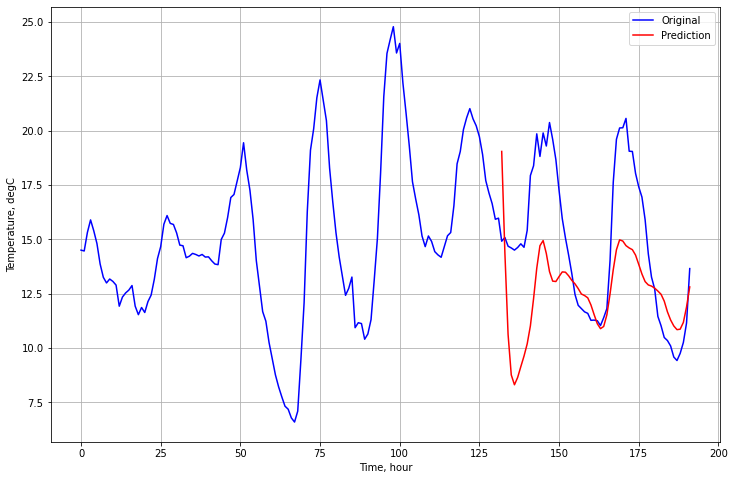

In [ ]:
# plot_ind = 100
plot_ind = plot_ind + 100
plt.figure(figsize=(12,8))
plt.plot(range(plot_len_step), plot_samples[plot_ind], "b", label="Original")
plt.plot(range((past+future)//6, plot_len_step), predictions[plot_ind], "r", label="Prediction")
# plt.plot(range(plot_len_step), predictions[plot_ind], "r", label="Prediction")
plt.xlabel("Time, hour")
plt.ylabel("Temperature, degC")
plt.grid(True)
plt.legend()
plt.show()

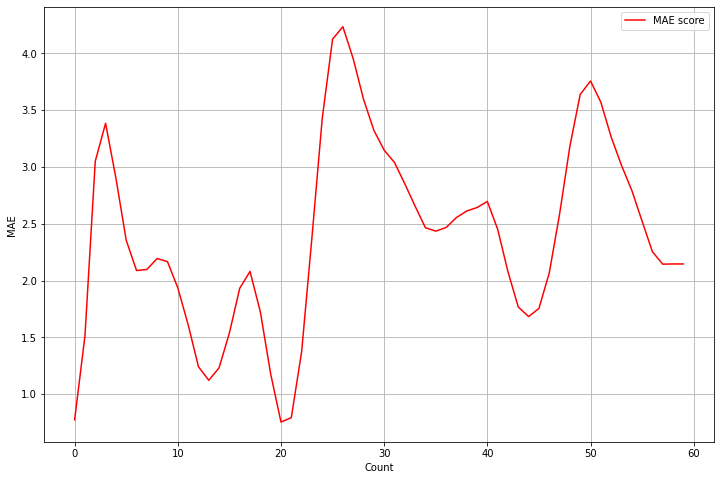

In [ ]:
plot_ind = 0
plot_ind = plot_ind + 1
plt.figure(figsize=(12,8))
plt.plot(range(pred_len_step), mae_score[plot_ind], "r", label="MAE score")
plt.xlabel("Count")
plt.ylabel("MAE")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
mean_mae_score = mae_score.mean(axis=0)
print(mean_mae_score)

[2.26611247 3.29694838 3.91125141 4.05469015 4.33362696 4.74403419
 5.09010394 5.29739161 5.38109358 5.39032648 5.24646392 4.84554232
 4.1709746  3.53311783 3.23623631 3.23711875 3.4003427  3.62448912
 3.79047062 3.77962798 3.61778147 3.40898069 3.22737626 3.11303886
 3.08706098 3.15026755 3.26498071 3.3832815  3.50316917 3.63428062
 3.78027026 3.93703232 4.09637703 4.19911326 4.19535565 4.0529735
 3.80923834 3.59906291 3.51235858 3.52063135 3.58490134 3.64036684
 3.64705119 3.61322637 3.55939016 3.48970564 3.41706421 3.34607161
 3.30228342 3.30954389 3.35313304 3.42456914 3.53112564 3.66343661
 3.78916678 3.88347847 3.95121606 3.99140182 3.9749755  3.88256581]


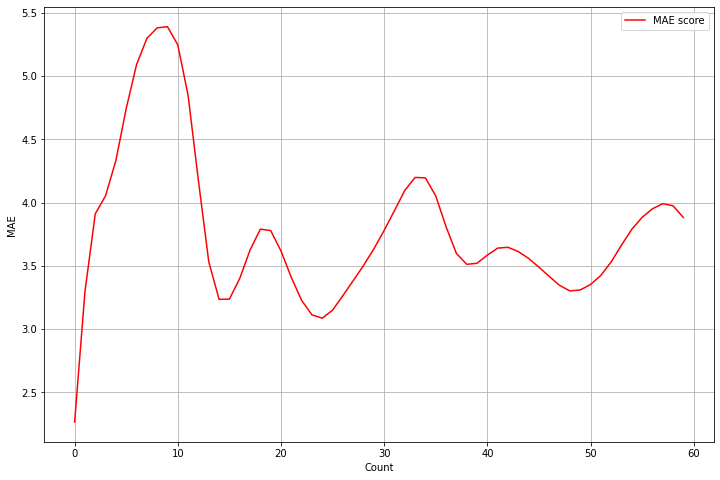

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(pred_len_step), mean_mae_score, "r", label="MAE score")
plt.xlabel("Count")
plt.ylabel("MAE")
plt.grid(True)
plt.legend()
plt.show()

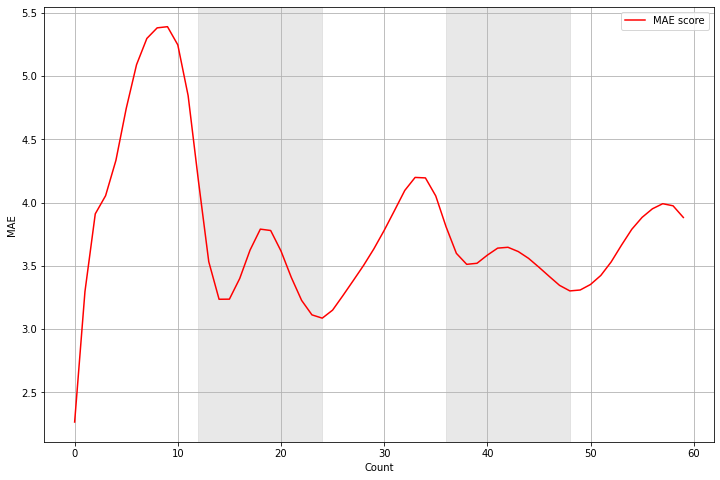

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(pred_len_step), mean_mae_score, "r", label="MAE score")
plt.axvspan(12, 24, alpha=0.5, color='lightgrey')
plt.axvspan(36, 48, alpha=0.5, color='lightgrey')
plt.xlabel("Count")
plt.ylabel("MAE")
plt.grid(True)
plt.legend()
plt.show()